In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *

sns.set(style="darkgrid")

In [2]:
raw_data = pd.read_csv('data/train.tsv', sep="\t")
df = preprocess(raw_data)

C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
df.dtypes

budget                          int64
genres                         object
homepage                        int32
original_language              object
overview                       object
popularity                    float64
release_date                   object
revenue                         int64
runtime                       float64
video                           int32
vote_average                  float64
vote_count                      int64
collection_id                  object
production_company_id          object
production_company_country     object
top_3_actors                   object
director_id                    object
producer_id                    object
dtype: object

In [4]:
def numerical_analysis(main_title,col,log1,log2,xlabel):
    fig, axs = plt.subplots(ncols=2)
    fig.suptitle(main_title+' analysis')
    fig.set_figheight(5)
    sns.boxplot(x=df[col],ax=axs[0])
    if log1:
        axs[0].set_xscale('log')
    axs[0].set_xlabel(xlabel)
    if log2:
        sns.distplot(df[col].apply(lambda x: np.log(x)) , axlabel=xlabel+' (log10)' , ax=axs[1])
    else:
        sns.distplot(df[col] , axlabel=xlabel , ax=axs[1])
        

In [71]:
numerical_vals = ['budget','popularity','revenue','runtime','vote_average','vote_count']
cat_vals = ['genres', 'homepage', 'original_language', 'video', 'production_company_country','director_id','producer_id','top_3_actors']
df[numerical_vals].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5.215000e+03,5215.000000,5215.000000,5215.000000
mean,2.147967e+07,10.016559,6.538743e+07,108.024353,6.399099,1062.861170
std,3.631509e+07,7.075799,1.432381e+08,22.732521,0.943931,2097.171489
min,1.000000e+00,1.519000,1.000000e+00,0.000000,0.000000,1.000000
25%,1.000000e+00,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


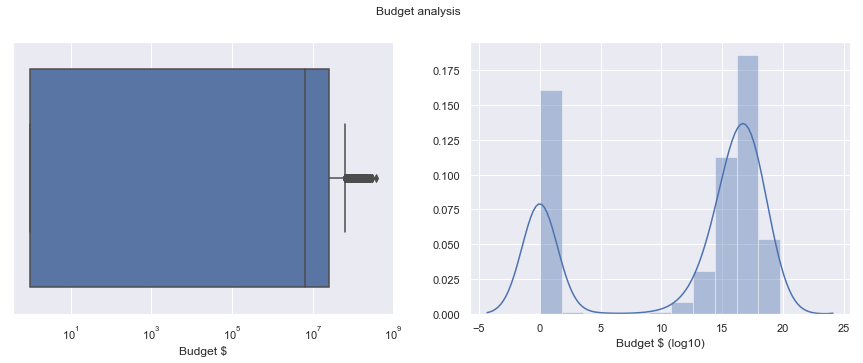

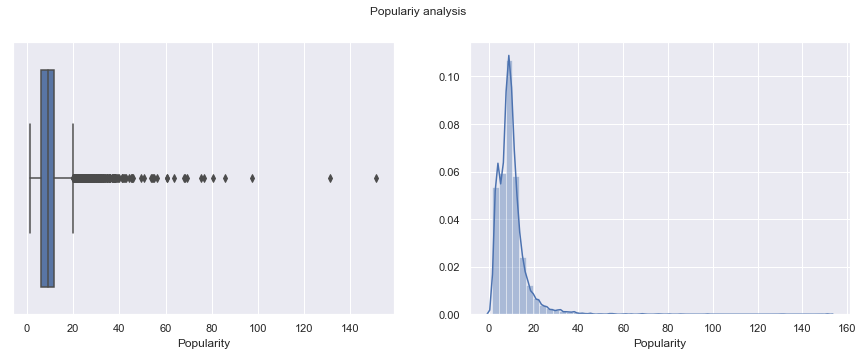

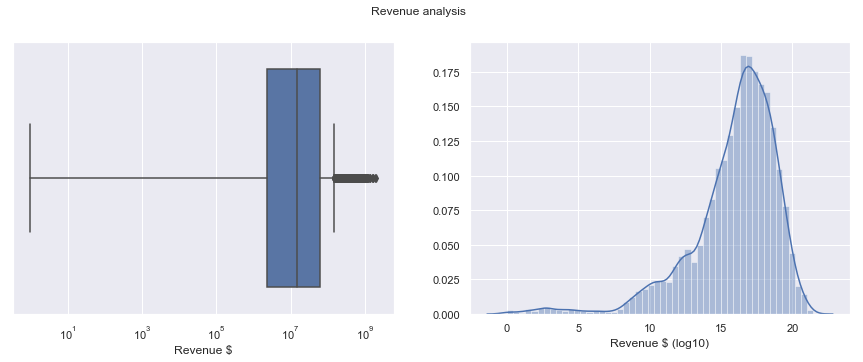

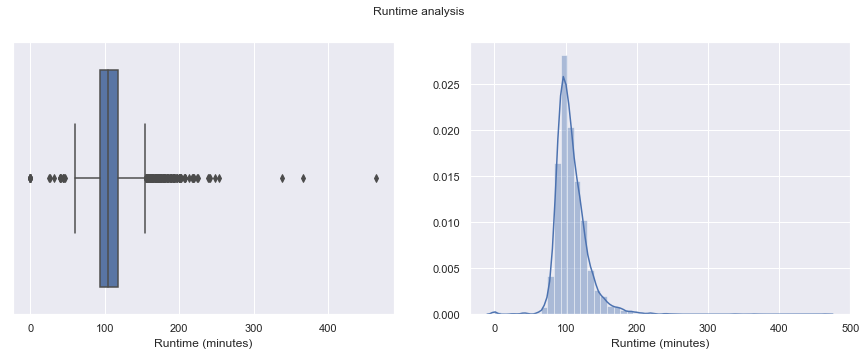

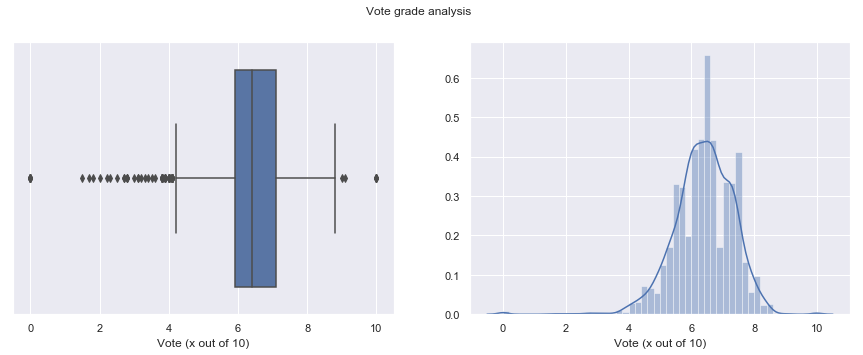

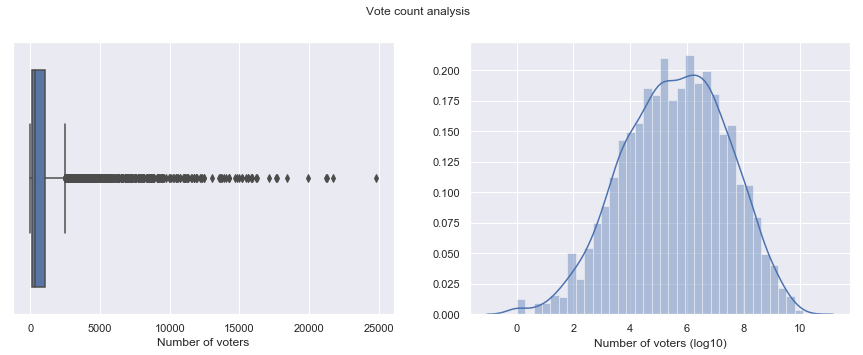

In [6]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
configurations = [
    ['Budget','budget',True,True,'Budget $'],
    ['Populariy','popularity',False,False,'Popularity'],
    ['Revenue','revenue',True,True,'Revenue $'],
    ['Runtime','runtime',False,False,'Runtime (minutes)'],
    ['Vote grade','vote_average',False,False,'Vote (x out of 10)'],
    ['Vote count','vote_count',False,True,'Number of voters']
]

for conf in configurations:
    numerical_analysis(*conf)


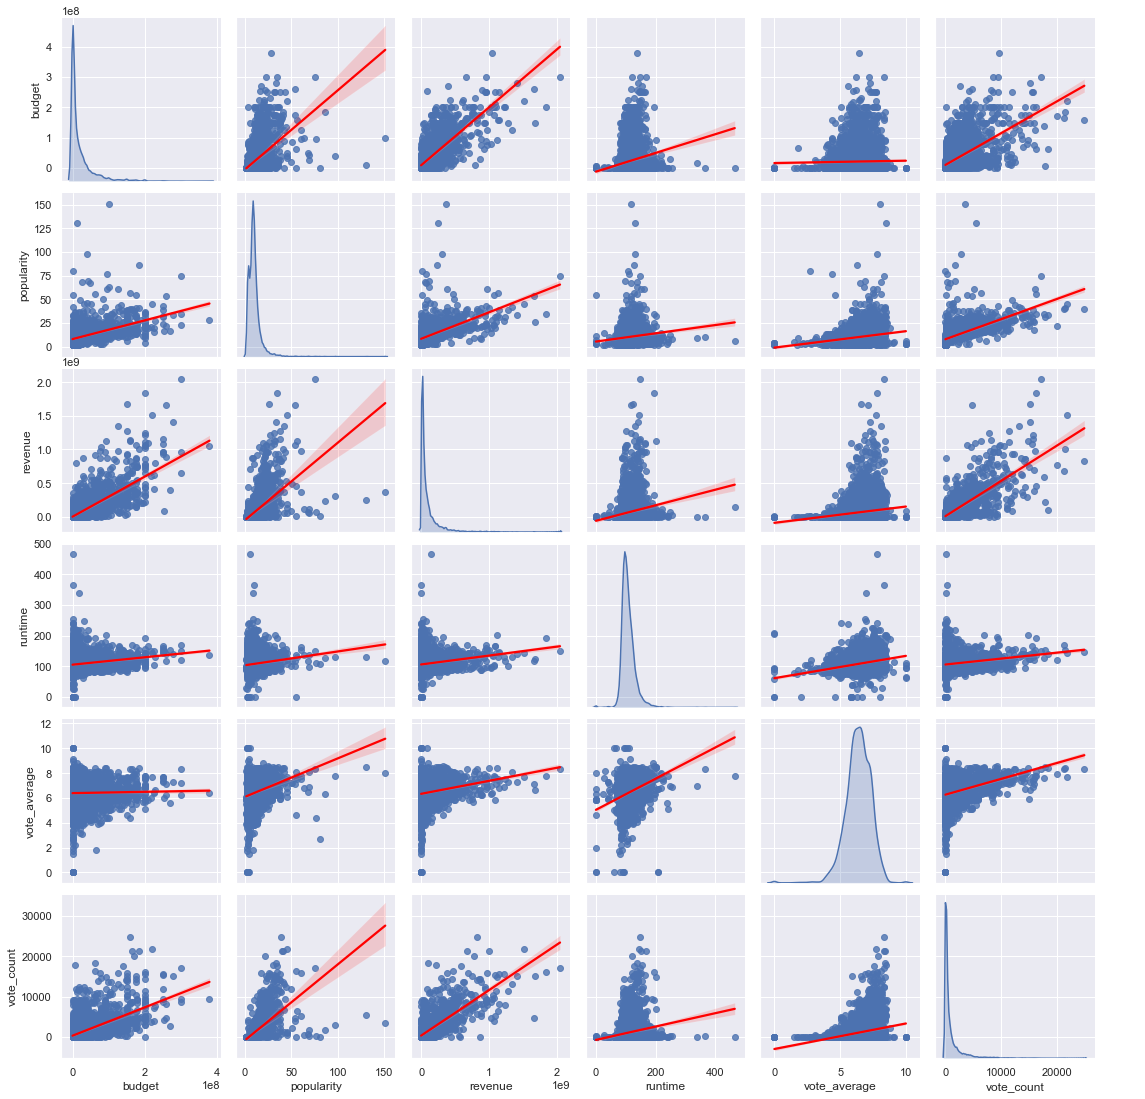

In [7]:
sns.pairplot(df[numerical_vals], diag_kind="kde",kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [8]:
# from copy import deepcopy
# df_rich = deepcopy(df)
# df_rich = enrich_dataset_by_dividing_genres(df_rich)
# df_rich.to_csv('./data/rich_df_genres.csv', index = False, header=True)
df_rich=pd.read_csv('./data/rich_df_genres.csv')

In [9]:
def plot_count_hist(col,rotation=False):
    fig = plt.figure()
    if col=='genres':
        sns.countplot(x=col,data=df_rich)
    else:
        sns.countplot(x=col,data=df)
    if rotation:
        plt.xticks(rotation=90)

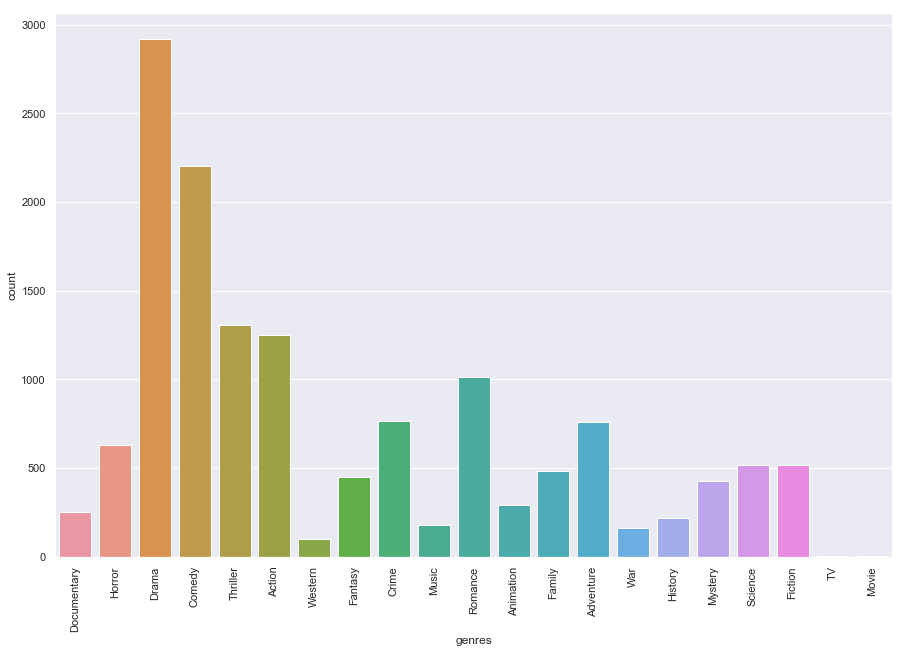

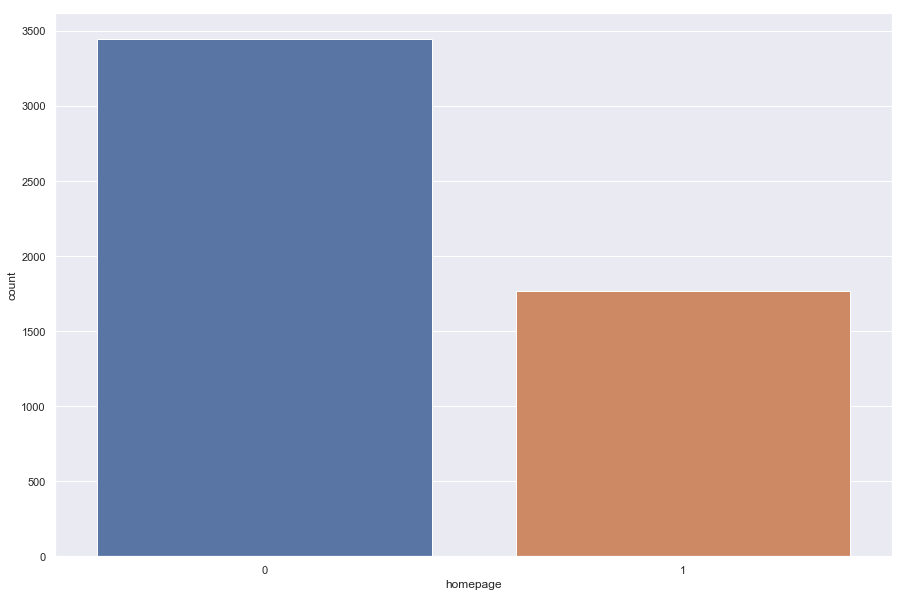

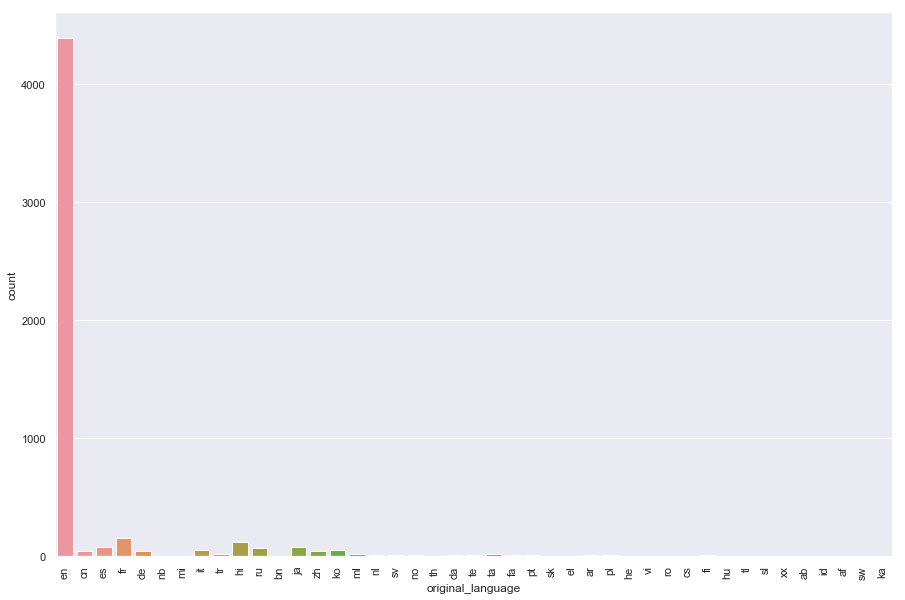

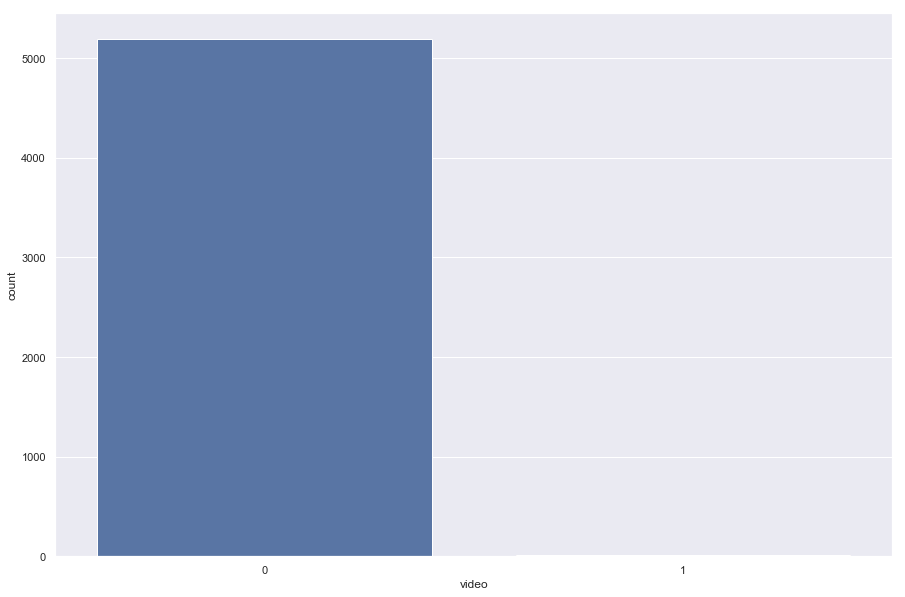

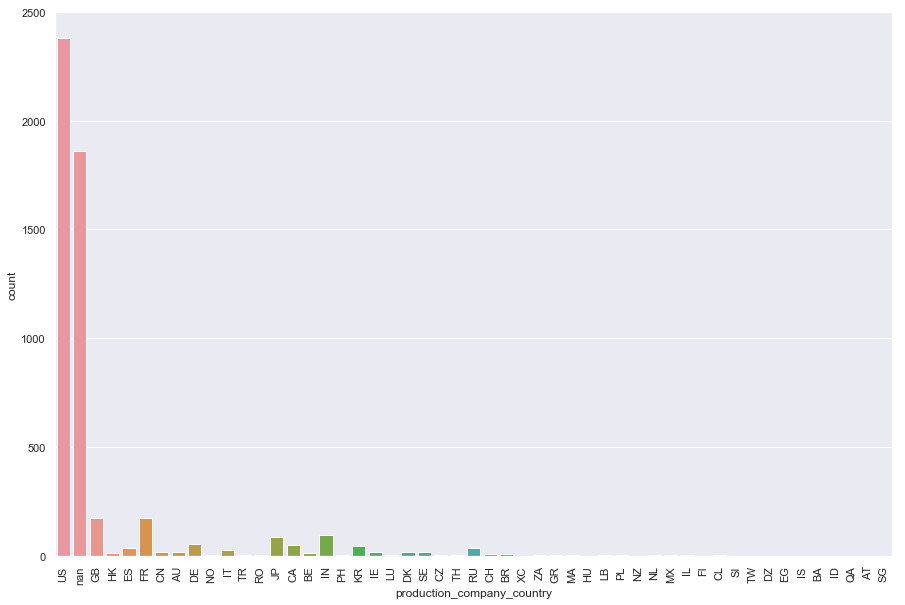

In [10]:
configurations = [
    ['genres',True],
    ['homepage'],
    ['original_language',True],
    ['video'],
    ['production_company_country',True]
]
for conf in configurations:
    plot_count_hist(*conf)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

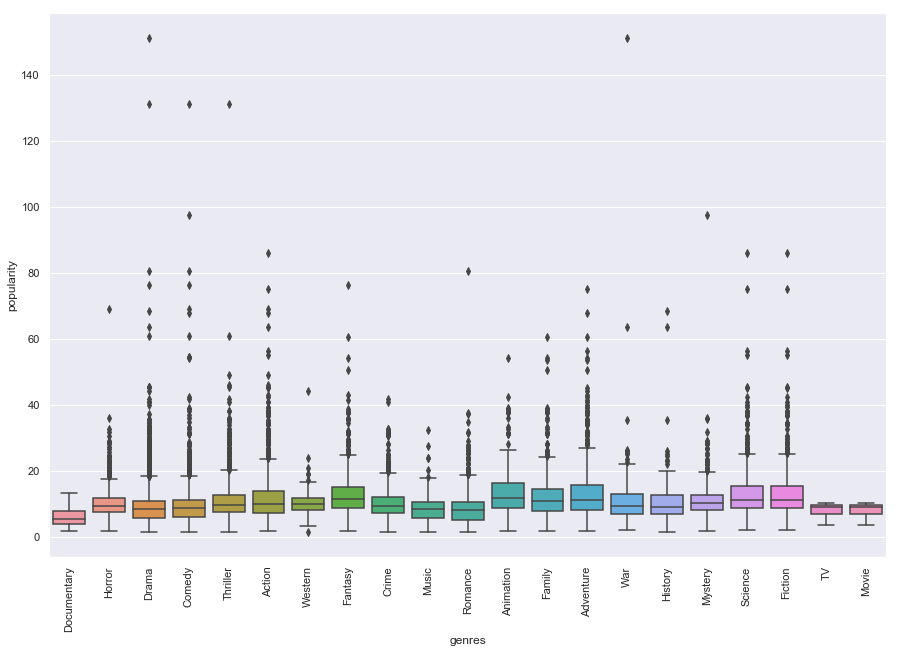

In [11]:
g = sns.boxplot(x=df_rich["genres"], y=df_rich["popularity"])
plt.xticks(rotation=90)

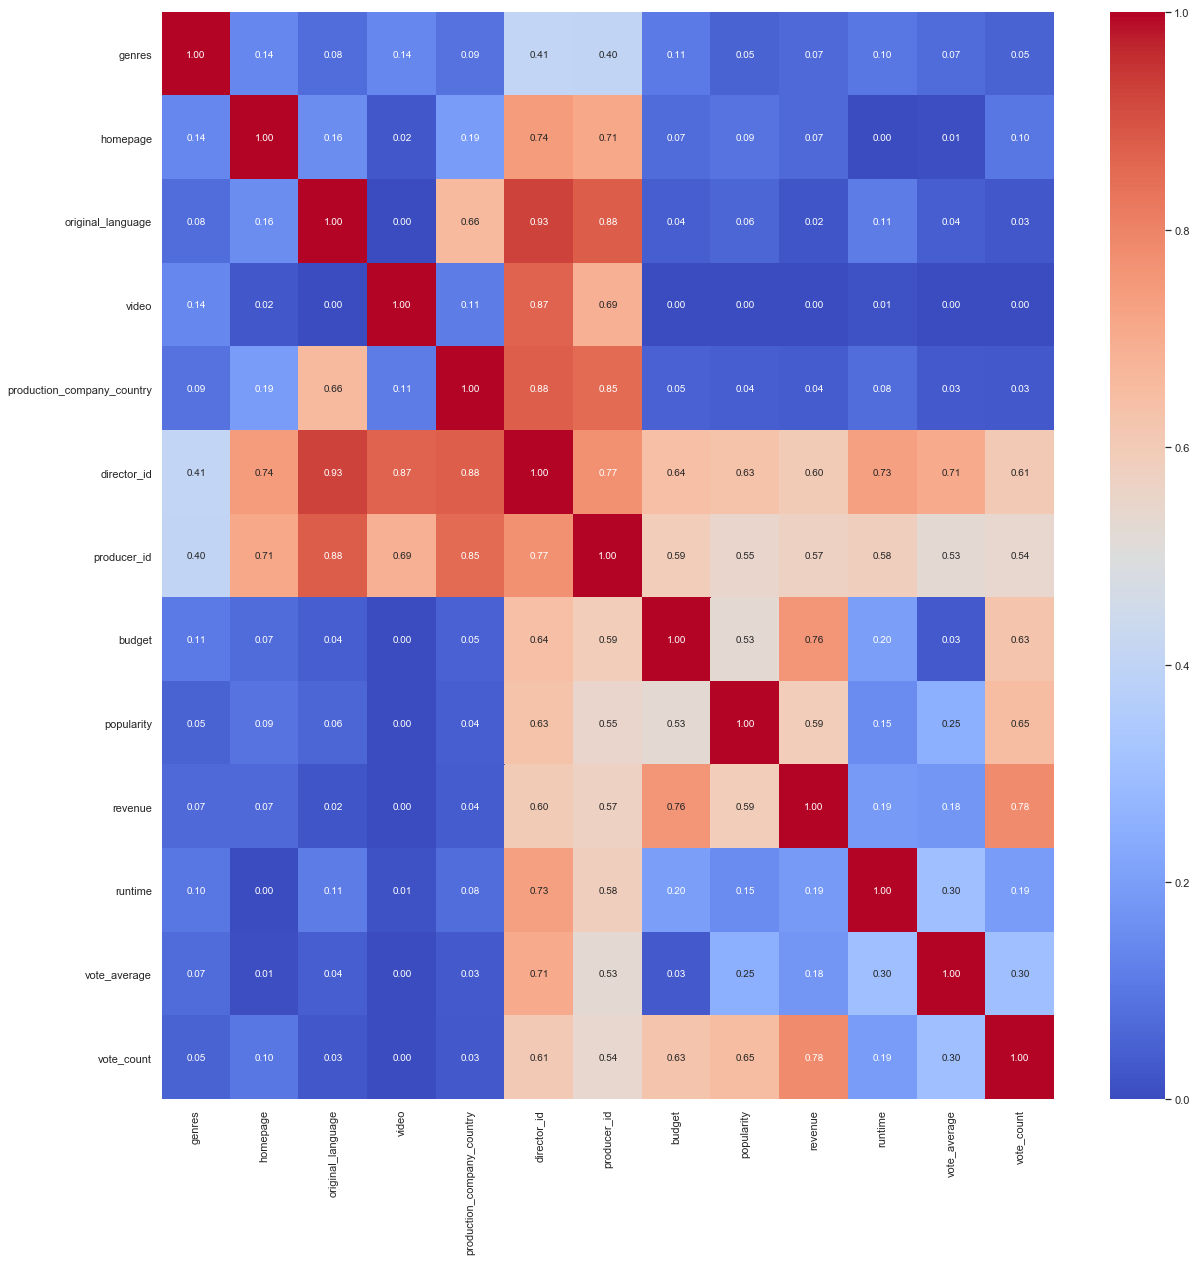

,genres,homepage,original_language,video,production_company_country,director_id,producer_id,budget,popularity,revenue,runtime,vote_average,vote_count
genres,1.000000,0.136720,0.078061,0.140528,0.089183,0.407096,0.402380,0.108942,0.053000,0.070261,0.099049,0.071366,0.050848
homepage,0.136720,1.000000,0.155367,0.024553,0.192428,0.743859,0.712009,0.071682,0.092093,0.070253,0.000542,0.005316,0.098613
original_language,0.078061,0.155367,1.000000,0.000000,0.660087,0.926703,0.881395,0.041887,0.062039,0.021499,0.110227,0.042909,0.026588
video,0.140528,0.024553,0.000000,1.000000,0.110770,0.867221,0.691237,0.000271,0.002235,0.000558,0.012765,0.002233,0.000734
production_company_country,0.089183,0.192428,0.660087,0.110770,1.000000,0.878053,0.852744,0.050011,0.040646,0.036093,0.077936,0.032071,0.028771
director_id,0.407096,0.743859,0.926703,0.867221,0.878053,1.000000,0.770313,0.643662,0.631863,0.600109,0.731805,0.705483,0.608436
producer_id,0.402380,0.712009,0.881395,0.691237,0.852744,0.770313,1.000000,0.593327,0.550154,0.573901,0.582369,0.530581,0.540277
budget,0.108942,0.071682,0.041887,0.000271,0.050011,0.643662,0.593327,1.000000,0.529546,0.758634,0.200877,0.032835,0.627530
popularity,0.053000,0.092093,0.062039,0.002235,0.040646,0.631863,0.550154,0.529546,1.000000,0.590821,0.151166,0.246738,0.650571
revenue,0.070261,0.070253,0.021499,0.000558,0.036093,0.600109,0.573901,0.758634,0.590821,1.000000,0.190041,0.179215,0.784849


In [103]:
df_extra_rich=pd.read_csv('./data/rich_df_actors_genres.csv')
df_extra_rich = df_extra_rich[~df_extra_rich['top_3_actors'].isna()]
df_extra_rich.reset_index(inplace=True)
associations(df_extra_rich[cat_vals+numerical_vals],nominal_columns=cat_vals,return_results=True)

In [13]:
len(np.unique(df['collection_id']))

712

In [14]:
len(np.unique(df['production_company_id']))

2369

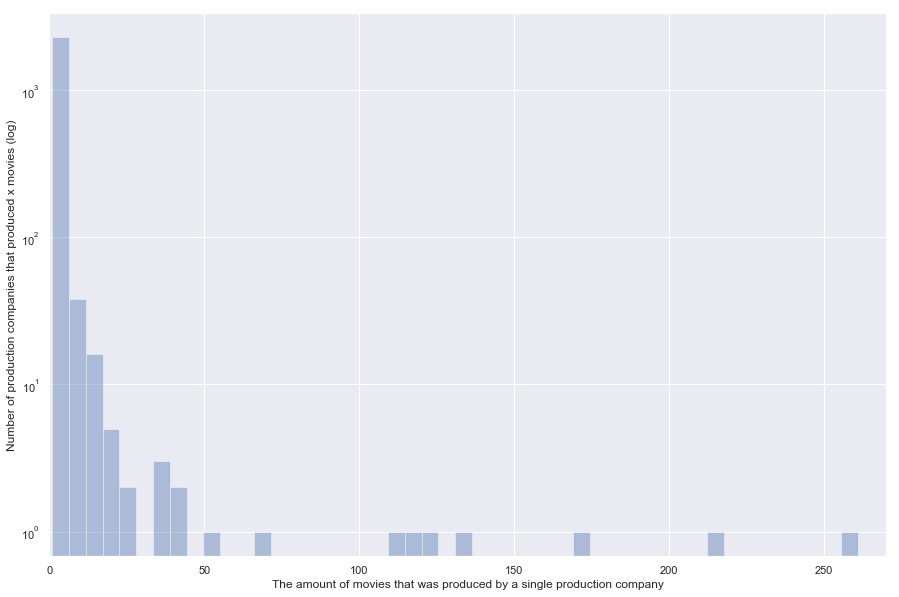

In [63]:
collection ={}
for cell in df['production_company_id']:
    if cell in collection.keys():
        collection[cell]+=1
    else:
        collection[cell]=1
        
dfObj = pd.DataFrame(sorted(collection.items(), key=lambda x: x[1],reverse=True), columns=['id','count'])
dfObj
sns.distplot(dfObj['count'],kde=False)
plt.xlim(0,270)
plt.ylabel('Number of production companies that produced x movies (log)')
plt.xlabel('The amount of movies that was produced by a single production company')
plt.yscale('log')

In [15]:
len(np.unique(df['director_id'].astype(str)))

2748

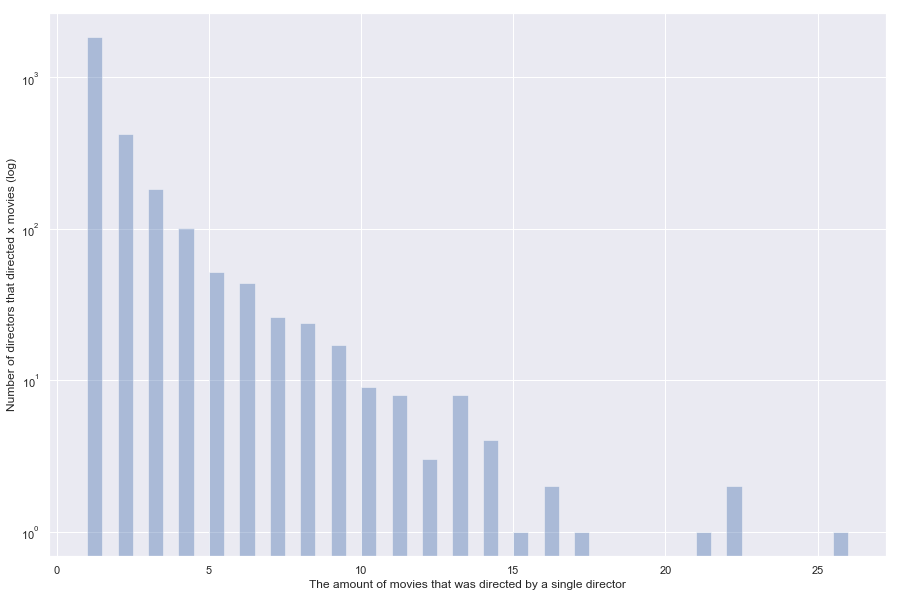

In [68]:
collection ={}
for cell in df['director_id']:
    if cell in collection.keys():
        collection[cell]+=1
    else:
        collection[cell]=1
        
dfObj = pd.DataFrame(sorted(collection.items(), key=lambda x: x[1],reverse=True), columns=['id','count'])
dfObj
sns.distplot(dfObj['count'],kde=False)
plt.ylabel('Number of directors that directed x movies (log)')
plt.xlabel('The amount of movies that was directed by a single director')
plt.yscale('log')

In [16]:
len(np.unique(df['producer_id'].astype(str)))

2268

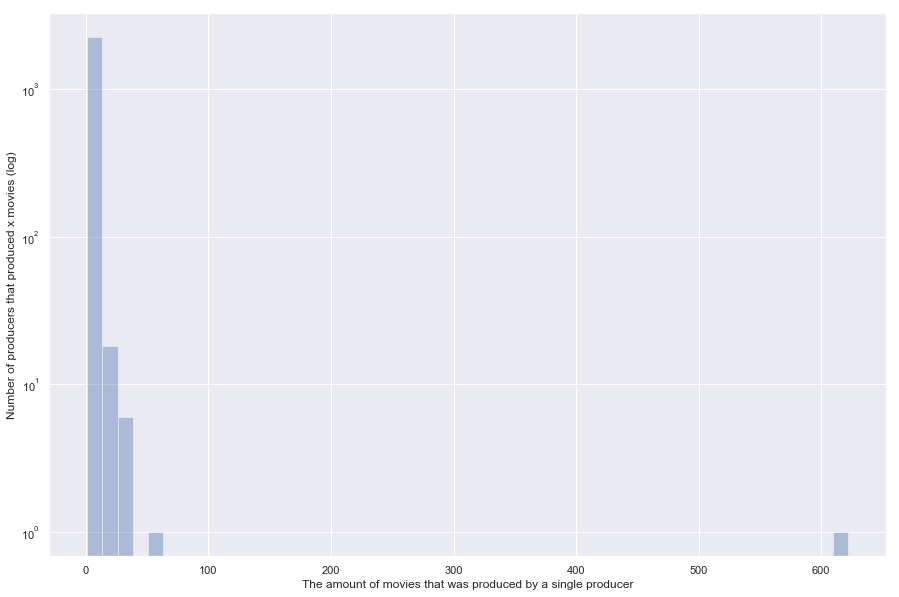

In [61]:
collection ={}
for cell in df['producer_id']:
    if cell in collection.keys():
        collection[cell]+=1
    else:
        collection[cell]=1
        
dfObj = pd.DataFrame(sorted(collection.items(), key=lambda x: x[1],reverse=True), columns=['id','count'])
dfObj
sns.distplot(dfObj['count'],kde=False)
plt.ylabel('Number of producers that produced x movies (log)')
plt.xlabel('The amount of movies that was produced by a single producer')
plt.yscale('log')

In [64]:
actors = set()
for cell in df['top_3_actors']:
    for actor in cell.split(' '):
        actors.add(actor)
len(actors)

7144

In [65]:
actor_dict = {actor:0 for actor in actors}
for cell in df['top_3_actors']:
    for actor in cell.split(' '):
        actor_dict[actor]+=1
dfObj = pd.DataFrame(sorted(actor_dict.items(), key=lambda x: x[1],reverse=True), columns=['id','count'])

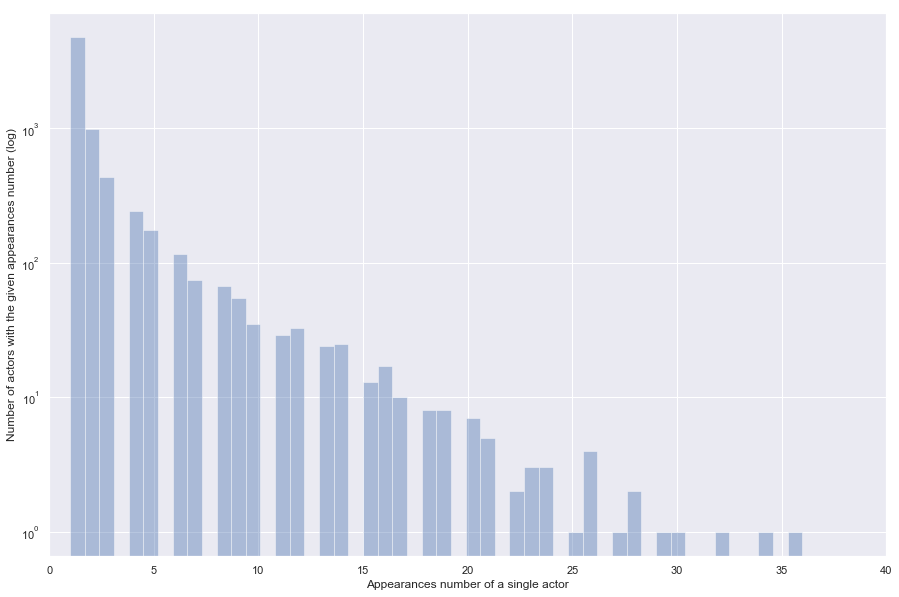

In [66]:
sns.distplot(dfObj['count'],kde=False)
plt.xlim(0,40)
plt.ylabel('Number of actors with the given appearances number (log)')
plt.xlabel('Appearances number of a single actor')
plt.yscale('log')

(1920, 2020)

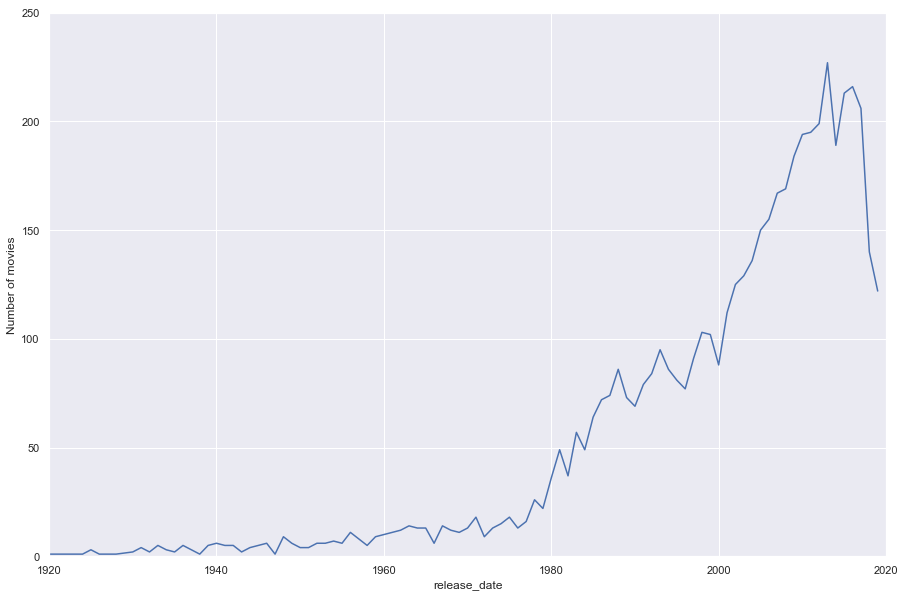

In [20]:
raw_data['release_date'] = pd.to_datetime(raw_data['release_date'])
raw_data['top_3_actors'].groupby(raw_data['release_date'].dt.year).count().plot()
plt.ylabel('Number of movies')
plt.ylim(0,250)
plt.xlim(1920,2020)